<a href="https://colab.research.google.com/github/bintefaisal/deep-learning-UGD/blob/main/MLP_Early_stopping_criteria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns

# Load tips dataset
tips = sns.load_dataset('tips')

# Preprocessing
# Converting categorical variables to dummy variables
tips = pd.get_dummies(tips, drop_first=True)

# Selecting features and target (predicting 'tip' based on other features)
X = tips.drop('tip', axis=1)
y = tips['tip']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Building the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu',
                          input_shape=(X_train.shape[1],)), # Input layer

    tf.keras.layers.Dense(32, activation='relu'), # Hidden layer

    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Training the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Evaluating the model (using Mean Squared Error)
loss = model.evaluate(X_test, y_test, verbose=0)
print('Mean Squared Error: ', loss[0])

Epoch 1/100
7/7 [==============================] - 1s 7ms/step - loss: 10.8677 - mae: 2.9839
Epoch 2/100
7/7 [==============================] - 0s 4ms/step - loss: 8.8327 - mae: 2.6239
Epoch 3/100
7/7 [==============================] - 0s 5ms/step - loss: 7.0814 - mae: 2.2757
Epoch 4/100
7/7 [==============================] - 0s 4ms/step - loss: 5.5498 - mae: 1.9358
Epoch 5/100
7/7 [==============================] - 0s 4ms/step - loss: 4.2820 - mae: 1.6112
Epoch 6/100
7/7 [==============================] - 0s 4ms/step - loss: 3.1979 - mae: 1.3362
Epoch 7/100
7/7 [==============================] - 0s 5ms/step - loss: 2.4573 - mae: 1.1610
Epoch 8/100
7/7 [==============================] - 0s 5ms/step - loss: 1.9813 - mae: 1.0588
Epoch 9/100
7/7 [==============================] - 0s 5ms/step - loss: 1.7095 - mae: 1.0133
Epoch 10/100
7/7 [==============================] - 0s 5ms/step - loss: 1.6037 - mae: 0.9870
Epoch 11/100
7/7 [==============================] - 0s 6ms/step - loss: 1.5341

In [4]:
tips.head()

,total_bill,tip,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,1.01,2,True,True,False,False,True,True
1,10.34,1.66,3,False,True,False,False,True,True
2,21.01,3.50,3,False,True,False,False,True,True
3,23.68,3.31,2,False,True,False,False,True,True
4,24.59,3.61,4,True,True,False,False,True,True


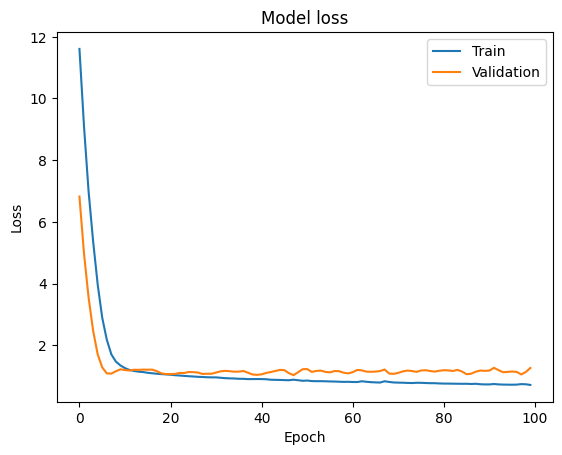

In [2]:
# Building the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)), # Input layer
    tf.keras.layers.Dense(32, activation='relu'), # Hidden layer
    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# train the model and plot the training and testing loss and accuracy at each epoc
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0, validation_data=(X_test, y_test))

# Evaluating the model (using Mean Squared Error)
loss = model.evaluate(X_test, y_test, verbose=0)
loss

# Plotting the training and testing loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

Epoch 1/100
7/7 [==============================] - 4s 128ms/step - loss: 12.5256 - val_loss: 7.7651
Epoch 2/100
7/7 [==============================] - 0s 50ms/step - loss: 10.4333 - val_loss: 6.3314
Epoch 3/100
7/7 [==============================] - 0s 32ms/step - loss: 8.7445 - val_loss: 5.1370
Epoch 4/100
7/7 [==============================] - 0s 24ms/step - loss: 7.3609 - val_loss: 4.0797
Epoch 5/100
7/7 [==============================] - 0s 29ms/step - loss: 6.0340 - val_loss: 3.1415
Epoch 6/100
7/7 [==============================] - 0s 28ms/step - loss: 4.8144 - val_loss: 2.3322
Epoch 7/100
7/7 [==============================] - 0s 24ms/step - loss: 3.6846 - val_loss: 1.7178
Epoch 8/100
7/7 [==============================] - 0s 35ms/step - loss: 2.8029 - val_loss: 1.3151
Epoch 9/100
7/7 [==============================] - 0s 23ms/step - loss: 2.1667 - val_loss: 1.1273
Epoch 10/100
7/7 [==============================] - 0s 28ms/step - loss: 1.7389 - val_loss: 1.1085
Epoch 11/100
7/7

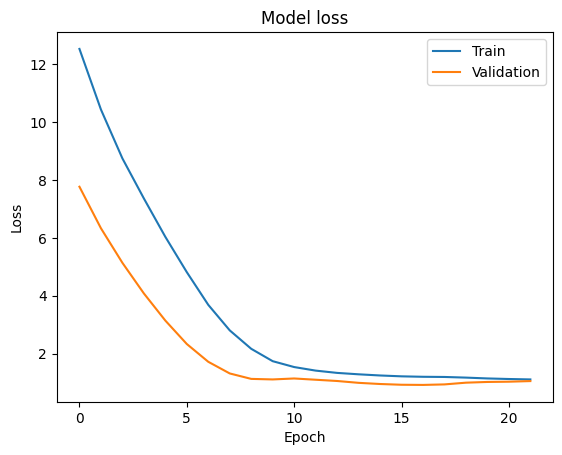

In [5]:
from tensorflow.keras.callbacks import EarlyStopping

# Building the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)), # Input layer
    tf.keras.layers.Dense(32, activation='relu'), # Hidden layer
    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Define the callback function
early_stopping = EarlyStopping(patience=5)

# Train the model with the callback function
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping])

# Evaluating the model (using Mean Squared Error)
loss = model.evaluate(X_test, y_test, verbose=0)
loss

# Plotting the training and testing loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()